<a href="https://colab.research.google.com/github/zangell44/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module4-clustering/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the TMDB 5000 dataset from Kaggle to try and cluster similar movies. 

It may be helpful to use PCA to reduce the dimensions of your data first - but then again maybe not. I dunno, you're the data scientist, you tell me. 🤪 

I'll let you download the dataset and get it into your notebook in the way that works best for you:

<https://www.kaggle.com/tmdb/tmdb-movie-metadata/version/2>

There are a few weird data cleaning steps that you'll need to do that I don't want you to get stuck on or spend a lot of time on so I'll try and help you out a little bit. 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/tmdb_5000_movies.csv")
print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
# There's probably some pandas function that will do this but...
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)  

In [69]:
# Filter the dataframe by only the numeric columns
df_numeric = df[num_list]
df_numeric.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [0]:
# lazily fill NaNs with zeros
df_numeric = df_numeric.fillna(value=0, axis=1)

# just going to drop ID since this isnt really a feature
df_numeric.drop(['id'],axis=1);

# You take it from here!

See what you can come up with. You have all the know-how! 

First, let's try basic k-means clustering on the numeric features.

In [0]:
# first, let's see what seems to be an appropraiate number of clusters
sum_of_squared_distances = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_numeric)
    sum_of_squared_distances.append(km.inertia_)

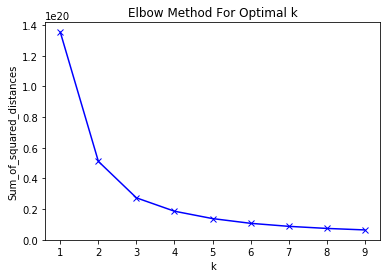

In [72]:
# graphing sum of squared distances
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the plot above, it seems like 4-5 clusters would be optimal. Let's explore the 4 cluster example.

In [0]:
# kmeans with k=4
km4 = KMeans(n_clusters=4)
km4 = km4.fit(df_numeric)
df['K4 Cluster Label'] = km4.labels_ # append this back to the original df

Using what we have above, let's randomly sample some movies in the same cluster.

In [74]:
for i in range (0,4):
  print ('Movies in Cluster', i, ':\n', df[df['K4 Cluster Label']==i]['title'].sample(10, random_state=1).values, '\n')  

Movies in Cluster 0 :
 ['Aqua Teen Hunger Force Colon Movie Film for Theaters' 'Slackers'
 'Beneath the Planet of the Apes' 'Circumstance' 'Astro Boy'
 'Return of the Living Dead 3' 'Enter the Dangerous Mind'
 '13 Hours: The Secret Soldiers of Benghazi' 'Vampires' 'Blue Like Jazz'] 

Movies in Cluster 1 :
 ['Dinosaur' 'Jason Bourne' "Ocean's Thirteen" 'Chicken Little'
 'Raiders of the Lost Ark' 'The Maze Runner' 'Rio 2'
 'Rambo: First Blood Part II' 'Ransom' 'X-Men: Apocalypse'] 

Movies in Cluster 2 :
 ['Swordfish' 'Final Destination 2' "Charlie's Angels"
 'Dinner for Schmucks' 'Step Up 3D' 'The Shallows' 'Sin City' 'Immortals'
 'Paranormal Activity 3' '2 Fast 2 Furious'] 

Movies in Cluster 3 :
 ['Pirates of the Caribbean: On Stranger Tides' 'Finding Nemo'
 'The Hunger Games: Mockingjay - Part 1' 'Up' 'E.T. the Extra-Terrestrial'
 'Shrek 2' 'Suicide Squad' 'Dawn of the Planet of the Apes'
 'Harry Potter and the Order of the Phoenix'
 'The Hunger Games: Catching Fire'] 



Certainly not the most consistent clusters by genre lol, but then again, that was not included in the numeric feature set.

Let's see what happens when we apply PCA before clustering.

In [75]:
# standardizing data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df_std = stdsc.fit_transform(df_numeric)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


First, let's examine how many components would suffice (although I would eventually like to plot in 2D)

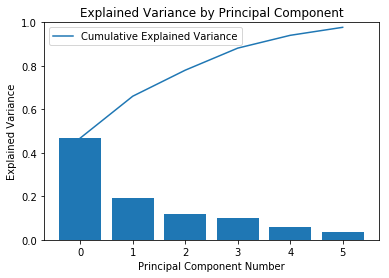

In [76]:
pca_all = PCA(6)
principal_components_all = pca_all.fit_transform(X=df_std)

plt.bar(range(0,6), pca_all.explained_variance_ratio_)
plt.plot(range(0,6), [sum(pca_all.explained_variance_ratio_[0:i]) for i in range(1,7)], label='Cumulative Explained Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.ylim(0.0,1.0)
plt.show()

So it's not going to be perfect, but let's use two principal components anyways.

In [0]:
pca_2 = PCA(2)
X_pca_2 = pca_2.fit_transform(X=df_std)
df_pca_2 = pd.DataFrame({'PC1' : X_pca_2[:,0],'PC2' : X_pca_2[:,1]})

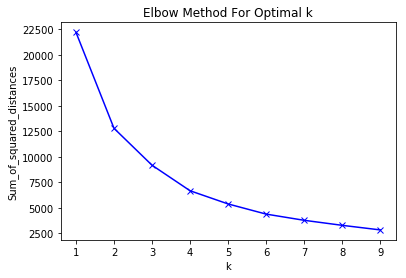

In [78]:
# now do clustering on this dataset
sum_of_squared_distances = []
K = range(1,10) # increases to the number of features in the dataframe
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca_2)
    sum_of_squared_distances.append(km.inertia_)
    
# graphing sum of squared distances
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Again, the 'elbow' seems to be around 4-5. Let's try 5 clusters and plot it.

In [0]:
# kmeans with k=5
km4 = KMeans(n_clusters=5)
km4 = km4.fit(df_pca_2)
df_pca_2['K5 Cluster Label'] = km4.labels_ # append this to PCA df

In [0]:
#!pip install seaborn==0.9.0 -q
import seaborn as sns

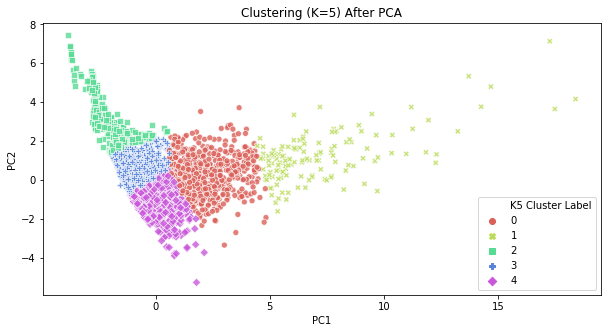

In [88]:
# plot the principal components and labels
palette = sns.color_palette("hls", 5)

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(ax=ax, x='PC1', y='PC2', data=df_pca_2, 
                hue='K5 Cluster Label',
                style='K5 Cluster Label',
                alpha=0.8,
                palette=palette,
                legend='full')

ax.set_title('Clustering (K=5) After PCA')

plt.show()

# Stretch Goal:

If you look at the original dataset you'll notice that I threw away some potentially useful columns. See if there are any that you could clean more effectively and turn into a numeric representation (probably some kind of one-hot-encoding of categorical variables) to assist your clustering. There's a lot more work here than the hours we have today however, so don't kill yourself trying to incorporate every single column from the original dataset, just take it one column at a time.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.